ARIMA(2, 0, 3) - RMSE: 2804695.19


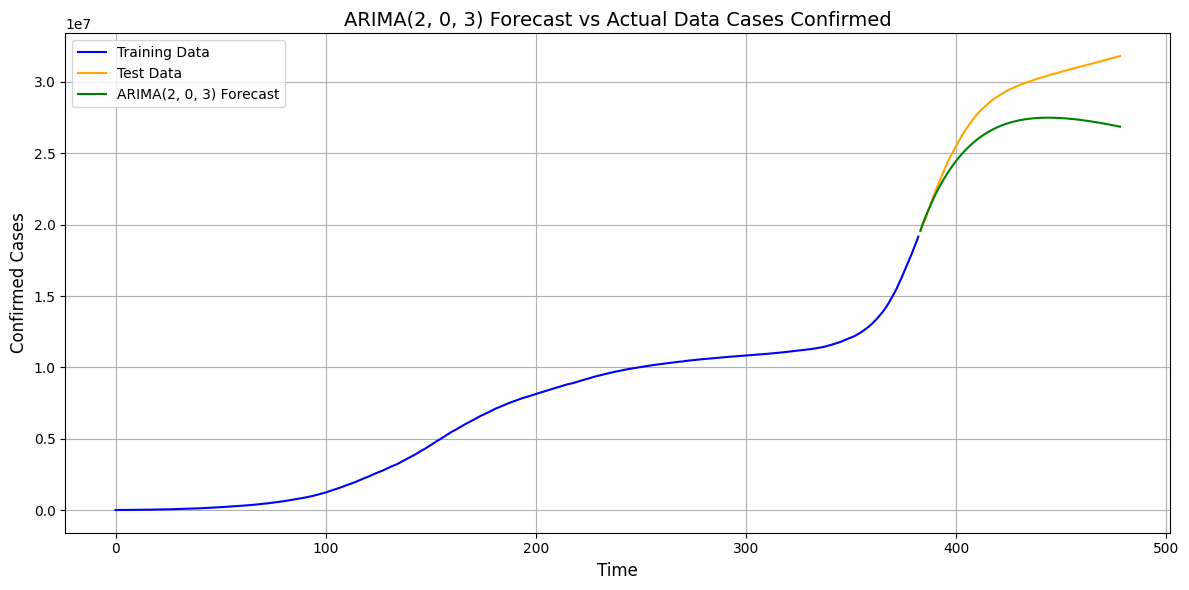

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv')

# Extract the columns of interest
time_series_confirmed = data['Confirmed']

# Train-test split (80-20 split)
train_size = int(0.8 * len(time_series_confirmed))
train_confirmed = time_series_confirmed[:train_size]
test_confirmed = time_series_confirmed[train_size:]

# Fit the ARIMA(2,0,3) model
selected_order = (2, 0, 3)
model = ARIMA(train_confirmed, order=selected_order).fit()

# Forecast the test period
forecast = model.forecast(steps=len(test_confirmed))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_confirmed, forecast))
print(f"ARIMA{selected_order} - RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_confirmed, label='Training Data', color='blue')

# Plot test data
plt.plot(test_confirmed.index, test_confirmed, label='Test Data', color='orange')

# Plot forecast
plt.plot(test_confirmed.index, forecast, label=f'ARIMA{selected_order} Forecast', color='green')

# Add labels, legend, and title
plt.title(f"ARIMA{selected_order} Forecast vs Actual Data Cases Confirmed", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()



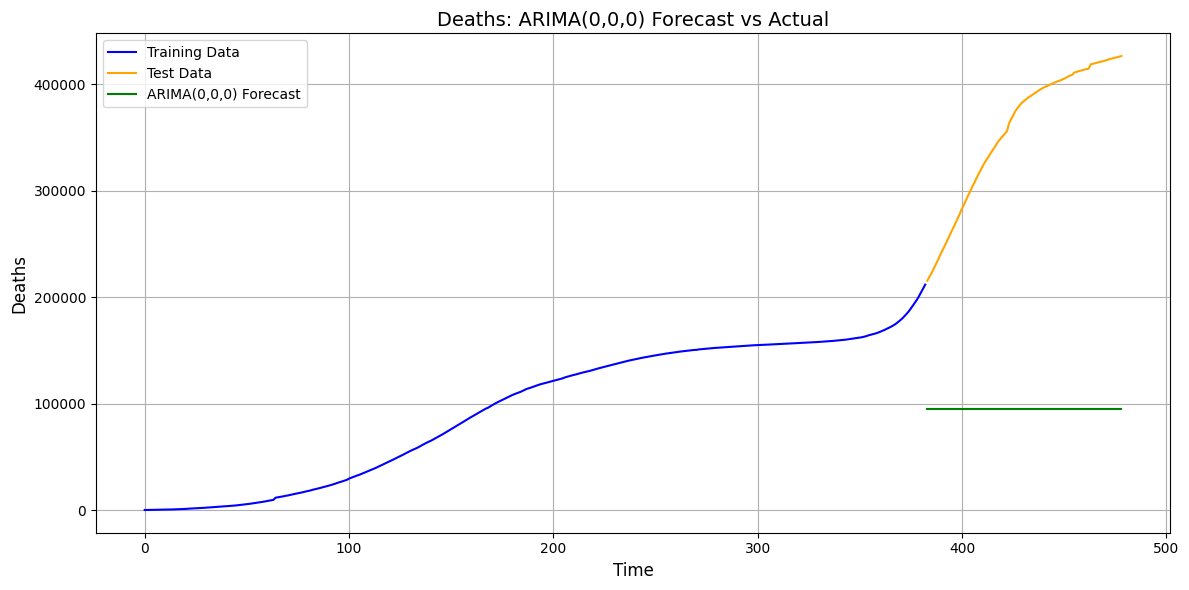


Summary of RMSEs for Deaths:
ARIMA(0,0,0) - RMSE: 268812.31


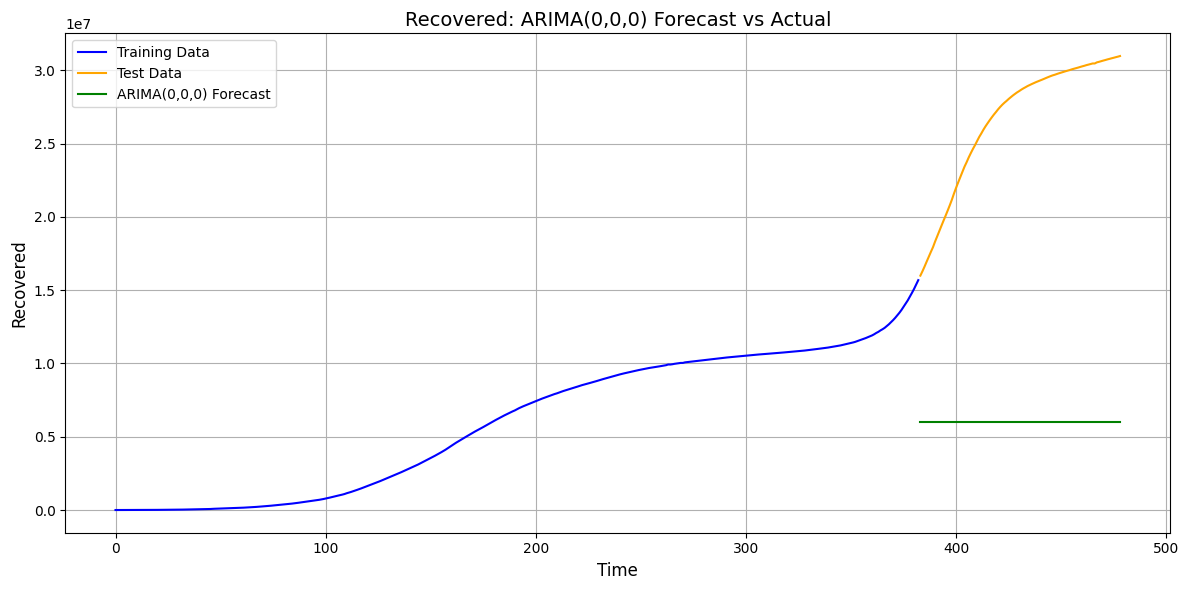


Summary of RMSEs for Recovered:
ARIMA(0,0,0) - RMSE: 21143557.59


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv')

# Extract columns of interest
time_series_deaths = data['Deaths']
time_series_recovered = data['Recovered']

# Train-test split (80-20 split)
train_size_deaths = int(0.8 * len(time_series_deaths))
train_size_recovered = int(0.8 * len(time_series_recovered))

train_deaths = time_series_deaths[:train_size_deaths]
test_deaths = time_series_deaths[train_size_deaths:]

train_recovered = time_series_recovered[:train_size_recovered]
test_recovered = time_series_recovered[train_size_recovered:]

# Function for grid search and plotting
def grid_search_and_plot(time_series, train_data, test_data, variable_name):
    forecasts = {}
    errors = {}

    for p in range(1):  # p up to 3
        for d in range(1):  # d up to 3
            for q in range(1):  # q up to 3
                try:
                    # Fit ARIMA model
                    model = ARIMA(train_data, order=(p, d, q)).fit()
                    
                    # Forecast for the test period
                    forecast = model.forecast(steps=len(test_data))
                    
                    # Calculate RMSE
                    rmse = np.sqrt(mean_squared_error(test_data, forecast))
                    
                    # Store results
                    forecasts[(p, d, q)] = forecast
                    errors[(p, d, q)] = rmse
                    
                    # Plot train + test vs forecast
                    plt.figure(figsize=(12, 6))
                    plt.plot(train_data, label='Training Data', color='blue')
                    plt.plot(test_data.index, test_data, label='Test Data', color='orange')
                    plt.plot(test_data.index, forecast, label=f'ARIMA({p},{d},{q}) Forecast', color='green')
                    plt.title(f"{variable_name}: ARIMA({p},{d},{q}) Forecast vs Actual", fontsize=14)
                    plt.xlabel("Time", fontsize=12)
                    plt.ylabel(variable_name, fontsize=12)
                    plt.legend(fontsize=10)
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                    print(f"ARIMA({p},{d},{q}) failed: {e}")
                    continue

    # Print summary of errors
    print(f"\nSummary of RMSEs for {variable_name}:")
    for (p, d, q), rmse in sorted(errors.items(), key=lambda x: x[1]):
        print(f"ARIMA({p},{d},{q}) - RMSE: {rmse:.2f}")

# Perform grid search and plot for 'Deaths'
grid_search_and_plot(time_series_deaths, train_deaths, test_deaths, "Deaths")

# Perform grid search and plot for 'Recovered'
grid_search_and_plot(time_series_recovered, train_recovered, test_recovered, "Recovered")


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Nov, 2024
Time:                     02:13:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    47.3140
Nobs:                     416.000    HQIC:                   46.5056
Log likelihood:          -11196.0    FPE:                9.30478e+19
AIC:                      45.9769    Det(Omega_mle):     6.79298e+19
--------------------------------------------------------------------
Results for equation Confirmed
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const              -338.632822       808.337748           -0.419           0.675
L1.Confirmed          1.777654         0.054285           32.747           0.000
L1.Deaths            -0.129380         0.933696         

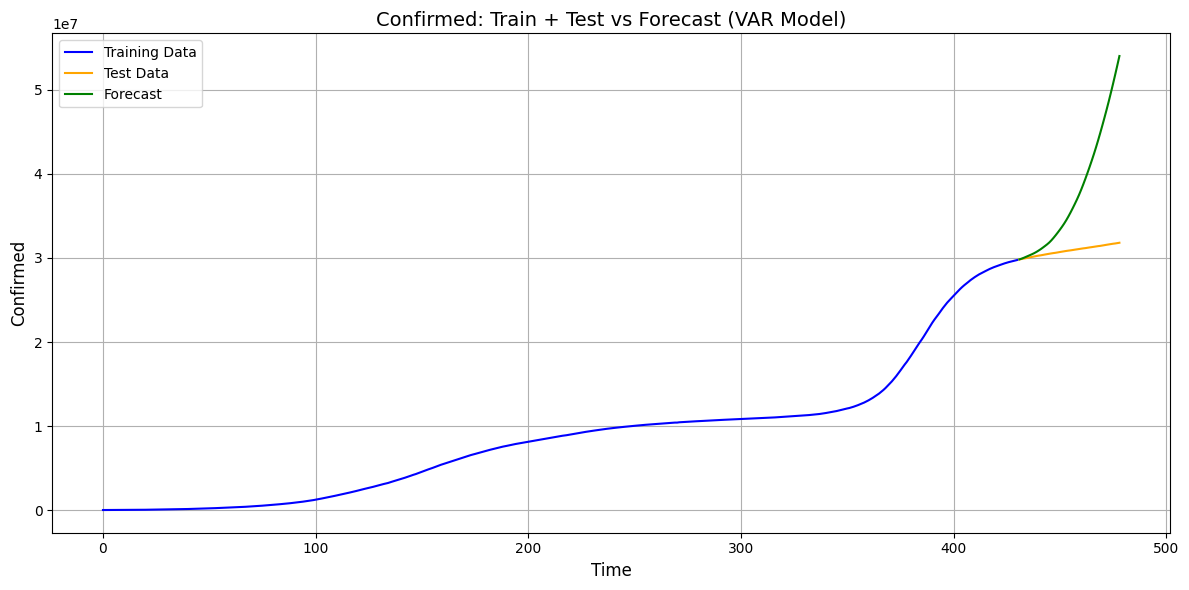

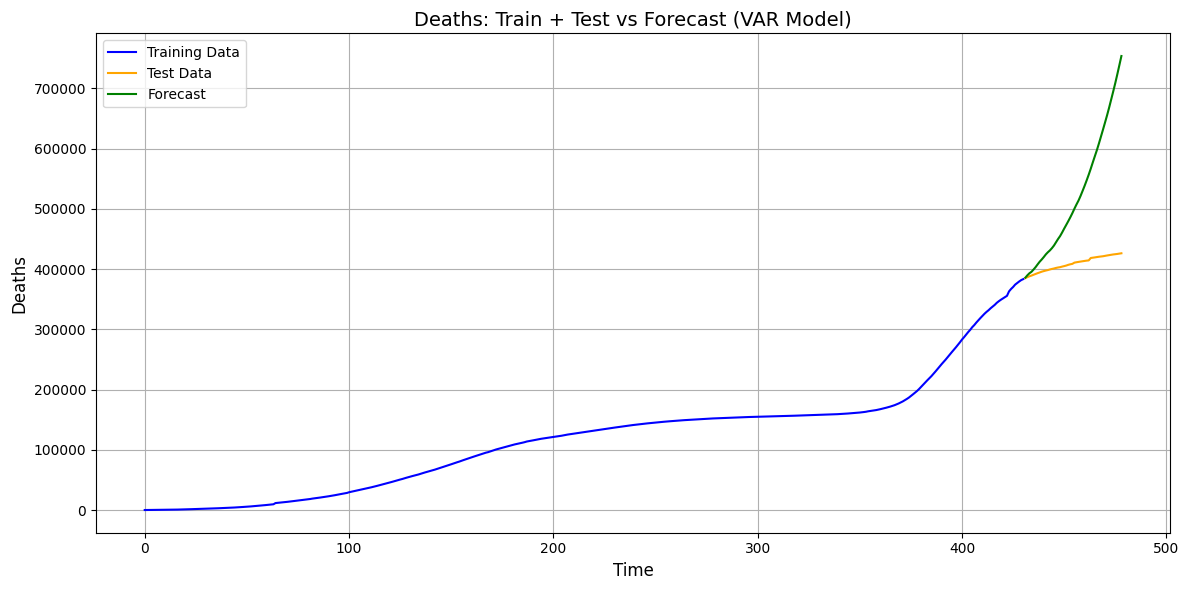

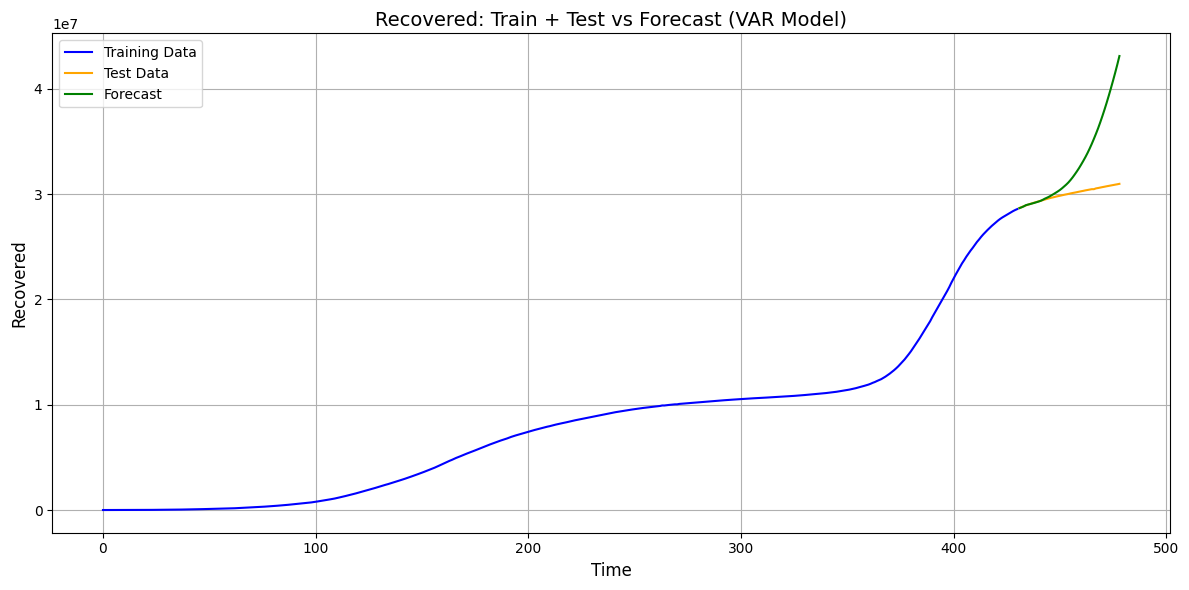


VAR Model Coefficients:
Lag 0 Coefficients:
Confirmed

Lag 1 Coefficients:
Deaths

Lag 2 Coefficients:
Recovered


Residuals for Each Variable:
       Confirmed      Deaths    Recovered
15    406.454641   12.898432    -1.430827
16    -58.577996    0.852666   179.101360
17     22.290668   -8.018076    91.052878
18    824.581965    4.193182   313.761482
19    -78.694257   35.408101  -337.916299
..           ...         ...          ...
426  -660.823375  266.811540  1108.207371
427   229.243428  196.166978 -3979.753923
428   732.619647   53.897315  -483.442803
429 -1138.861842 -549.072586 -3831.975876
430  -475.665193 -164.030694  1572.617429

[416 rows x 3 columns]


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv')

# Extract relevant columns
time_series = data[['Confirmed', 'Deaths', 'Recovered']]

# Train-test split (80-20 split)
train_size = int(0.9 * len(time_series))
train = time_series[:train_size]
test = time_series[train_size:]

# Fit VAR model
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')  # Automatically choose the optimal lag length
print(results.summary())

# Forecast for the test period
forecast = results.forecast(train.values, steps=len(test))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=['Confirmed_forecast', 'Deaths_forecast', 'Recovered_forecast'], index=test.index)

# Calculate RMSE for each variable
rmse_confirmed = np.sqrt(mean_squared_error(test['Confirmed'], forecast_df['Confirmed_forecast']))
rmse_deaths = np.sqrt(mean_squared_error(test['Deaths'], forecast_df['Deaths_forecast']))
rmse_recovered = np.sqrt(mean_squared_error(test['Recovered'], forecast_df['Recovered_forecast']))

print(f"RMSE - Confirmed: {rmse_confirmed:.2f}")
print(f"RMSE - Deaths: {rmse_deaths:.2f}")
print(f"RMSE - Recovered: {rmse_recovered:.2f}")

# Plot train + test vs forecast for each variable
variables = ['Confirmed', 'Deaths', 'Recovered']

for var in variables:
    plt.figure(figsize=(12, 6))
    
    # Plot training data
    plt.plot(train[var], label='Training Data', color='blue')
    
    # Plot test data
    plt.plot(test.index, test[var], label='Test Data', color='orange')
    
    # Plot forecast
    plt.plot(test.index, forecast_df[f'{var}_forecast'], label='Forecast', color='green')
    
    # Add labels and title
    plt.title(f"{var}: Train + Test vs Forecast (VAR Model)", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Present model coefficients and parameters
print("\nVAR Model Coefficients:")
for i, coef in enumerate(results.params):
    print(f"Lag {i} Coefficients:\n{coef}\n")

# Present residuals
print("\nResiduals for Each Variable:")
print(results.resid)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, Nov, 2024
Time:                     02:00:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    47.6176
Nobs:                     464.000    HQIC:                   46.8710
Log likelihood:          -12598.8    FPE:                1.40018e+20
AIC:                      46.3863    Det(Omega_mle):     1.05446e+20
--------------------------------------------------------------------
Results for equation Confirmed
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               723.481805       658.415240            1.099           0.272
L1.Confirmed          1.769077         0.050568           34.984           0.000
L1.Deaths            -0.182237         0.719131         

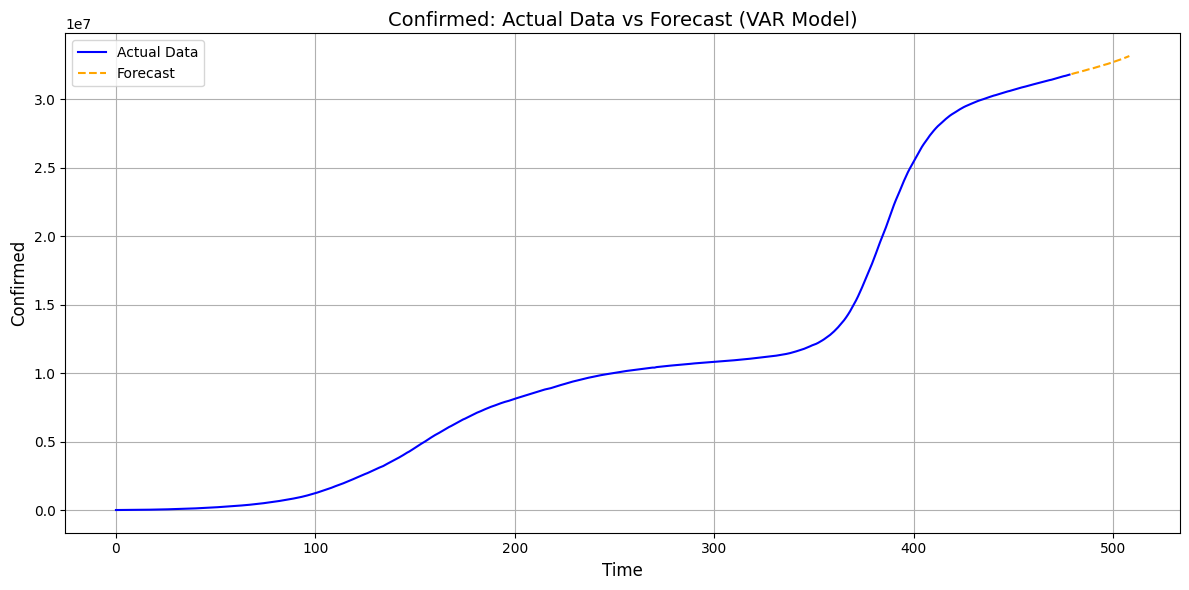

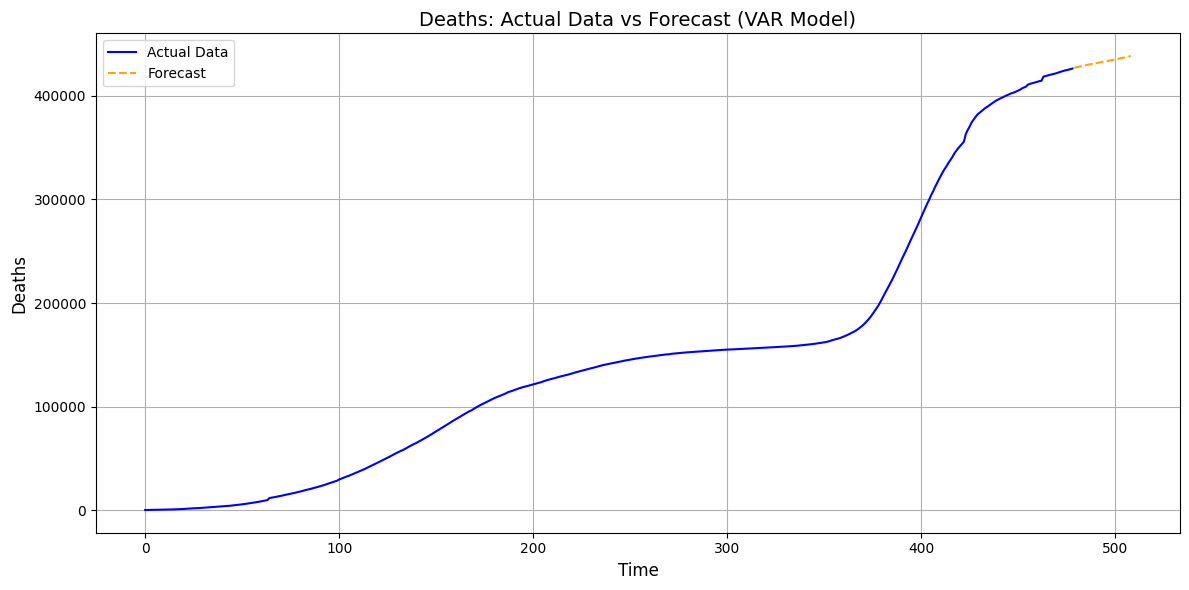

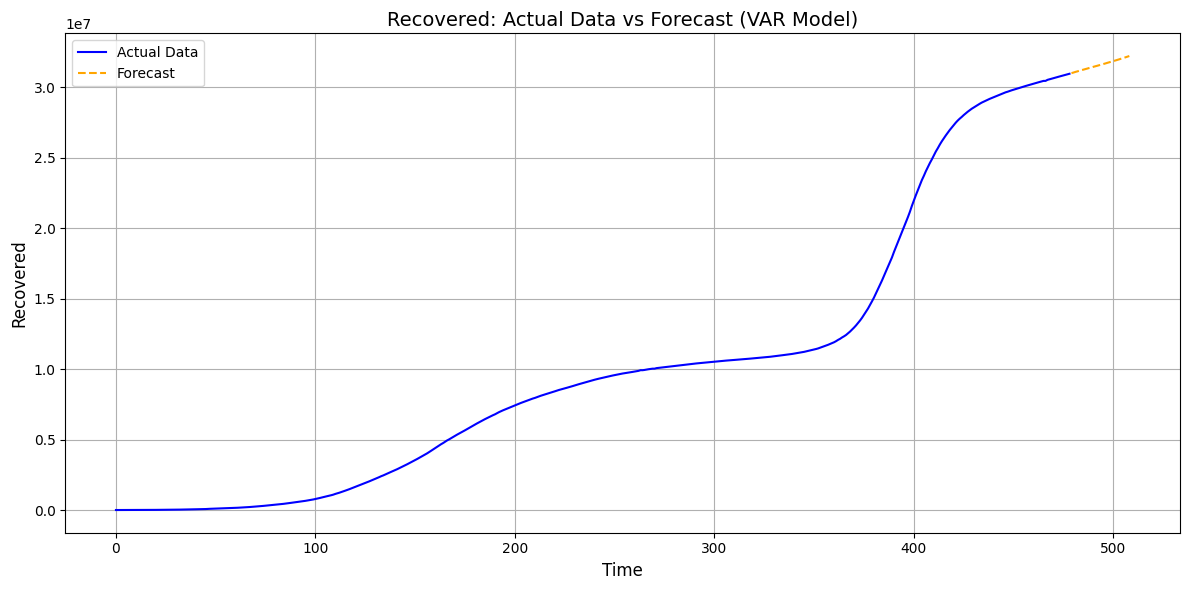


VAR Model Coefficients:
Lag 0 Coefficients:
Confirmed

Lag 1 Coefficients:
Deaths

Lag 2 Coefficients:
Recovered


Residuals for Each Variable:
       Confirmed      Deaths    Recovered
15   -485.007589  -61.705031   -71.368448
16   -976.722045  -74.495853    68.809965
17   -895.518981  -75.722761    71.887470
18    -53.471748  -72.708434   369.842185
19   -891.551512  -43.966972  -279.725680
..           ...         ...          ...
474  3928.194645   34.019716  3628.168694
475 -5842.207241 -193.551867   -97.481754
476 -4089.238376   11.605413 -5750.100348
477  1921.125044 -242.885434  2377.832219
478  3628.200790  348.612979  8246.313467

[464 rows x 3 columns]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv')

# Extract relevant columns
time_series = data[['Confirmed', 'Deaths', 'Recovered']]

# Fit VAR model on the entire dataset
model = VAR(time_series)
results = model.fit(maxlags=15, ic='aic')  # Automatically choose the optimal lag length
print(results.summary())

# Forecast for a specified number of steps (e.g., next 30 days)
forecast_steps = 30
forecast = results.forecast(time_series.values, steps=forecast_steps)

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast, columns=['Confirmed_forecast', 'Deaths_forecast', 'Recovered_forecast'])

# Extend the index for the forecast period
forecast_index = range(len(time_series), len(time_series) + forecast_steps)
forecast_df.index = forecast_index

# Combine actual data with forecasts
combined_df = pd.concat([time_series, forecast_df], axis=0)

# Plot actual data and forecasts for each variable
variables = ['Confirmed', 'Deaths', 'Recovered']

for var in variables:
    plt.figure(figsize=(12, 6))
    
    # Plot actual data
    plt.plot(time_series[var], label='Actual Data', color='blue')
    
    # Plot forecast data
    plt.plot(forecast_df.index, forecast_df[f'{var}_forecast'], label='Forecast', color='orange', linestyle='--')
    
    # Add labels and title
    plt.title(f"{var}: Actual Data vs Forecast (VAR Model)", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display model coefficients
print("\nVAR Model Coefficients:")
for i, coef in enumerate(results.params):
    print(f"Lag {i} Coefficients:\n{coef}\n")

# Display residuals
print("\nResiduals for Each Variable:")
print(results.resid)


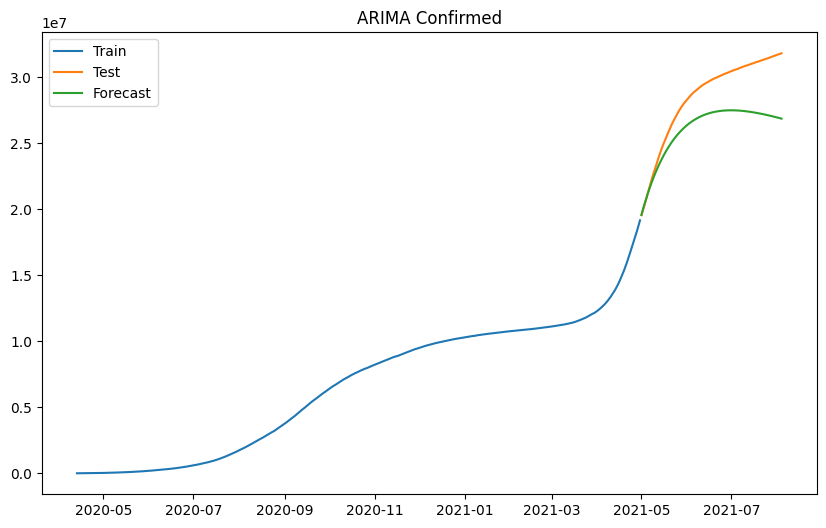

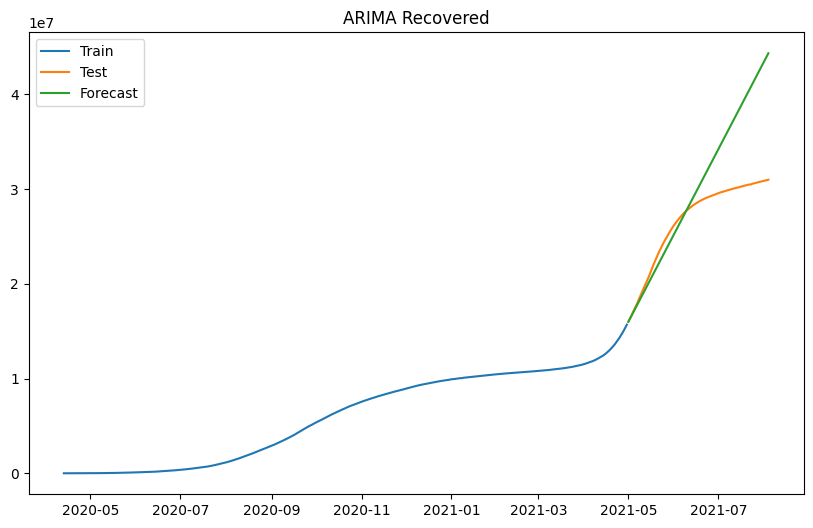

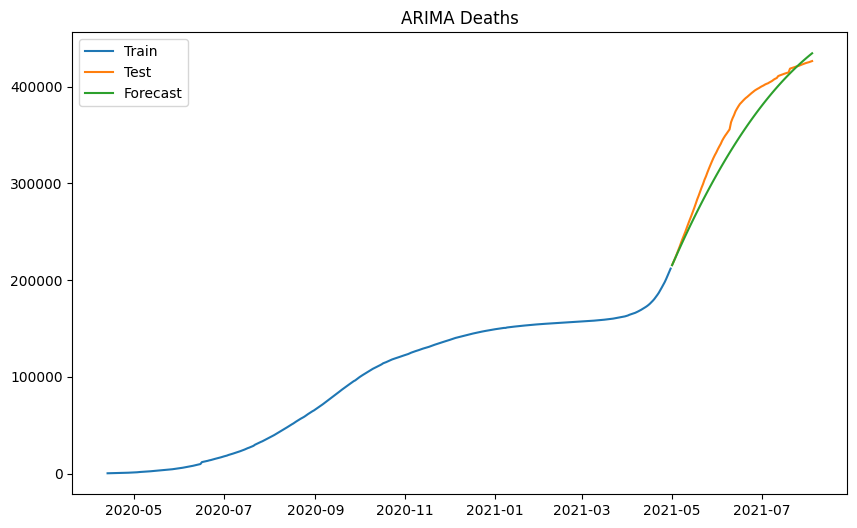

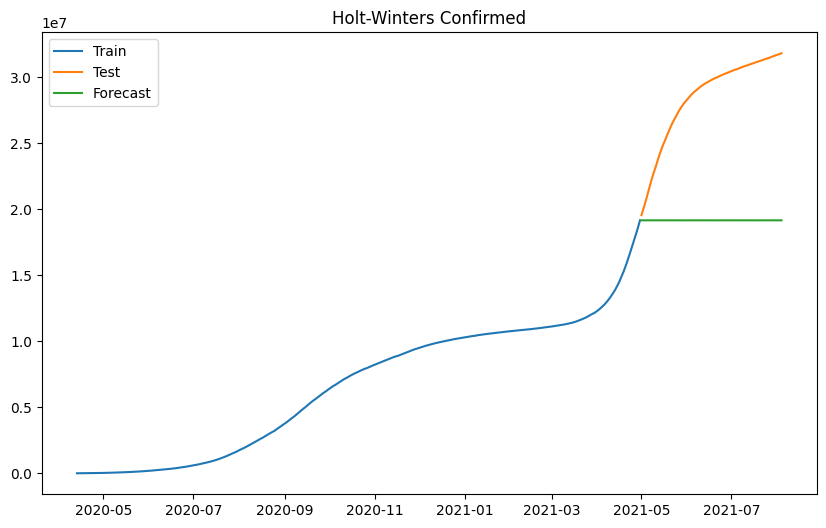

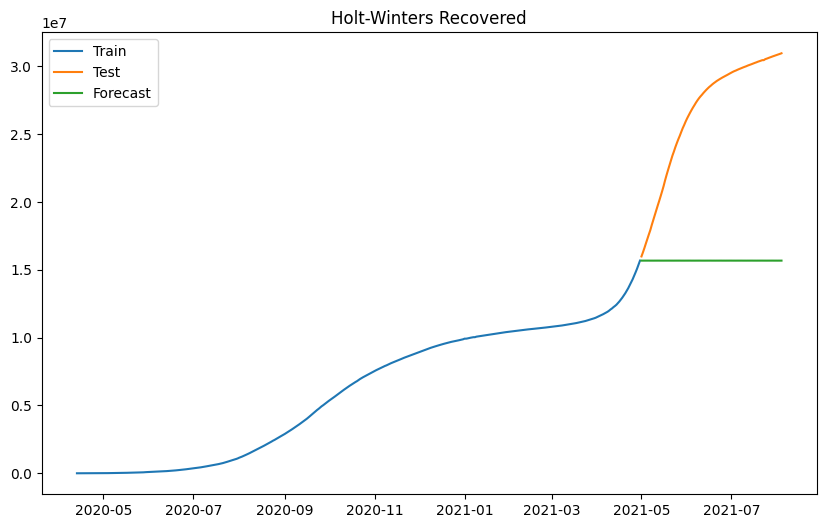

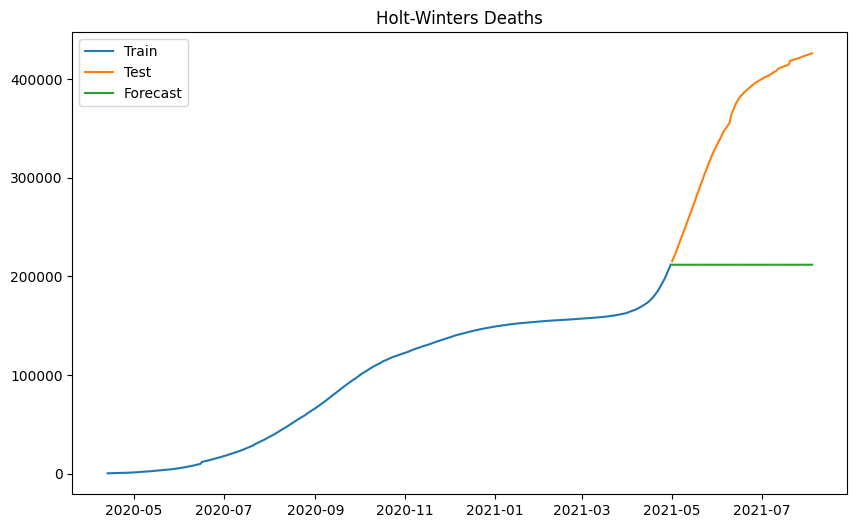

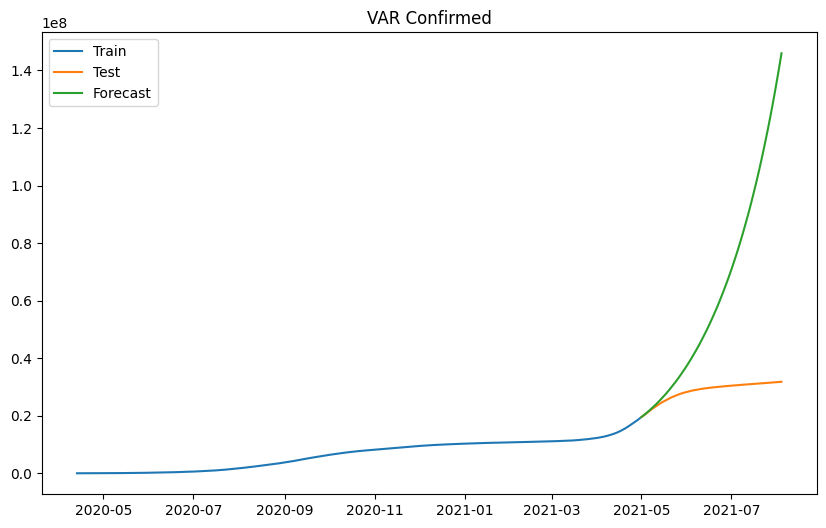

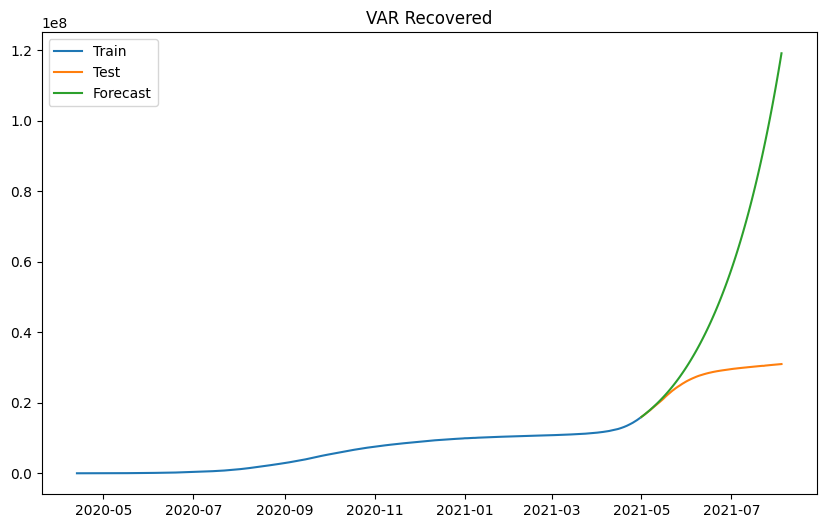

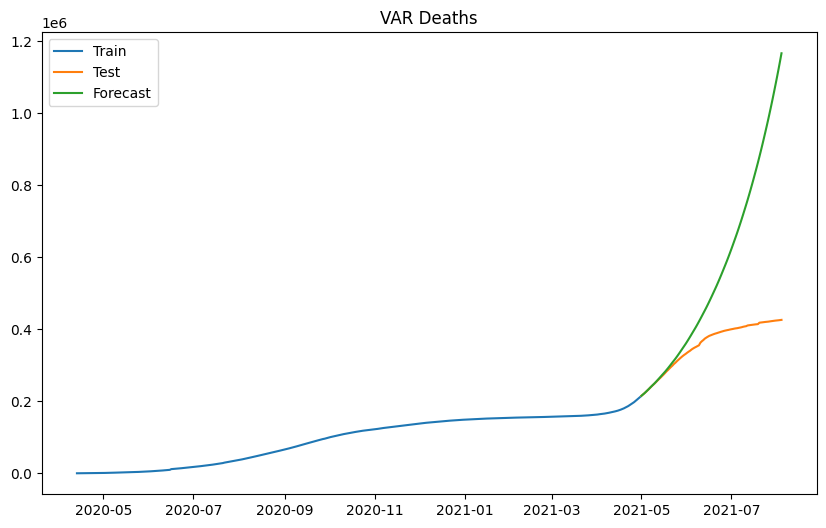

RMSE Comparison:
ARIMA: {'Confirmed': 2804695.1934837326, 'Recovered': 5769764.473386181, 'Deaths': 18340.527191631136}
Holt-Winters: {'Confirmed': 9892409.92171986, 'Recovered': 11832456.826273067, 'Deaths': 158209.58932107393}
VAR: {'Confirmed': 47816208.11164901, 'Recovered': 35714077.16954666, 'Deaths': 294133.89514718193}


In [30]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Ensure data is numeric
data = data[['Confirmed', 'Recovered', 'Deaths']].astype(float)

# Split into train and test sets
train_ratio = 0.8
split_index = int(len(data) * train_ratio)
train, test = data[:split_index], data[split_index:]

# Forecast with ARIMA
def fit_arima(train, order, column):
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return model_fit, forecast

arima_confirmed, forecast_confirmed = fit_arima(train, (2, 0, 3), 'Confirmed')
arima_recovered, forecast_recovered = fit_arima(train, (1, 1, 1), 'Recovered')
arima_deaths, forecast_deaths = fit_arima(train, (2, 0, 0), 'Deaths')

# Forecast with Holt-Winters
def fit_holtwinters(train, column):
    model = ExponentialSmoothing(train[column], seasonal='add', seasonal_periods=7)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return model_fit, forecast

hw_confirmed, hw_forecast_confirmed = fit_holtwinters(train, 'Confirmed')
hw_recovered, hw_forecast_recovered = fit_holtwinters(train, 'Recovered')
hw_deaths, hw_forecast_deaths = fit_holtwinters(train, 'Deaths')

# Forecast with VAR
var_model = VAR(train)
var_model_fit = var_model.fit(maxlags=15)
var_forecast = var_model_fit.forecast(train.values[-var_model_fit.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=train.columns)

# RMSE Calculation
def calculate_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

rmse_arima = {
    "Confirmed": calculate_rmse(test['Confirmed'], forecast_confirmed),
    "Recovered": calculate_rmse(test['Recovered'], forecast_recovered),
    "Deaths": calculate_rmse(test['Deaths'], forecast_deaths),
}

rmse_holtwinters = {
    "Confirmed": calculate_rmse(test['Confirmed'], hw_forecast_confirmed),
    "Recovered": calculate_rmse(test['Recovered'], hw_forecast_recovered),
    "Deaths": calculate_rmse(test['Deaths'], hw_forecast_deaths),
}

rmse_var = {
    "Confirmed": calculate_rmse(test['Confirmed'], var_forecast_df['Confirmed']),
    "Recovered": calculate_rmse(test['Recovered'], var_forecast_df['Recovered']),
    "Deaths": calculate_rmse(test['Deaths'], var_forecast_df['Deaths']),
}

# Plot results
def plot_forecast(train, test, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

plot_forecast(train['Confirmed'], test['Confirmed'], forecast_confirmed, "ARIMA Confirmed")
plot_forecast(train['Recovered'], test['Recovered'], forecast_recovered, "ARIMA Recovered")
plot_forecast(train['Deaths'], test['Deaths'], forecast_deaths, "ARIMA Deaths")

plot_forecast(train['Confirmed'], test['Confirmed'], hw_forecast_confirmed, "Holt-Winters Confirmed")
plot_forecast(train['Recovered'], test['Recovered'], hw_forecast_recovered, "Holt-Winters Recovered")
plot_forecast(train['Deaths'], test['Deaths'], hw_forecast_deaths, "Holt-Winters Deaths")

plot_forecast(train['Confirmed'], test['Confirmed'], var_forecast_df['Confirmed'], "VAR Confirmed")
plot_forecast(train['Recovered'], test['Recovered'], var_forecast_df['Recovered'], "VAR Recovered")
plot_forecast(train['Deaths'], test['Deaths'], var_forecast_df['Deaths'], "VAR Deaths")

# Print RMSE comparison
print("RMSE Comparison:")
print("ARIMA:", rmse_arima)
print("Holt-Winters:", rmse_holtwinters)
print("VAR:", rmse_var)


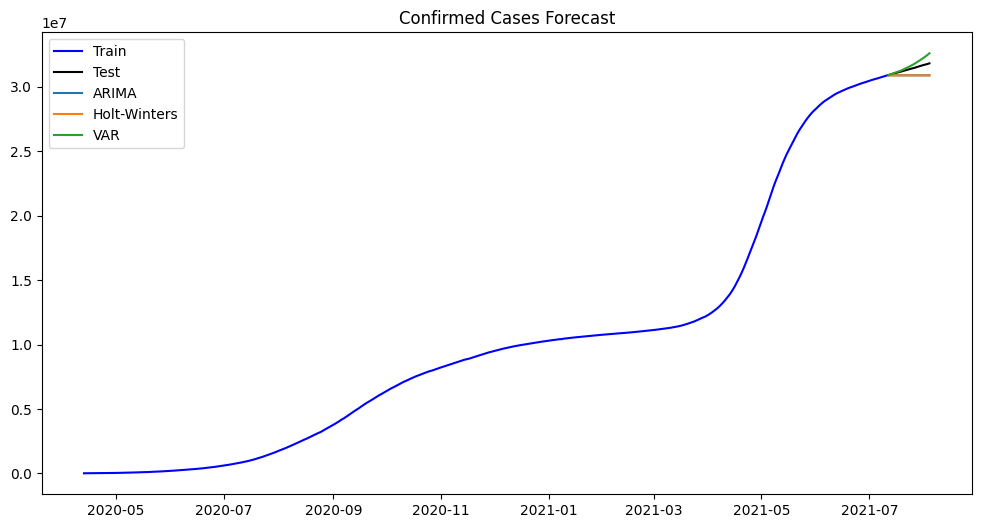

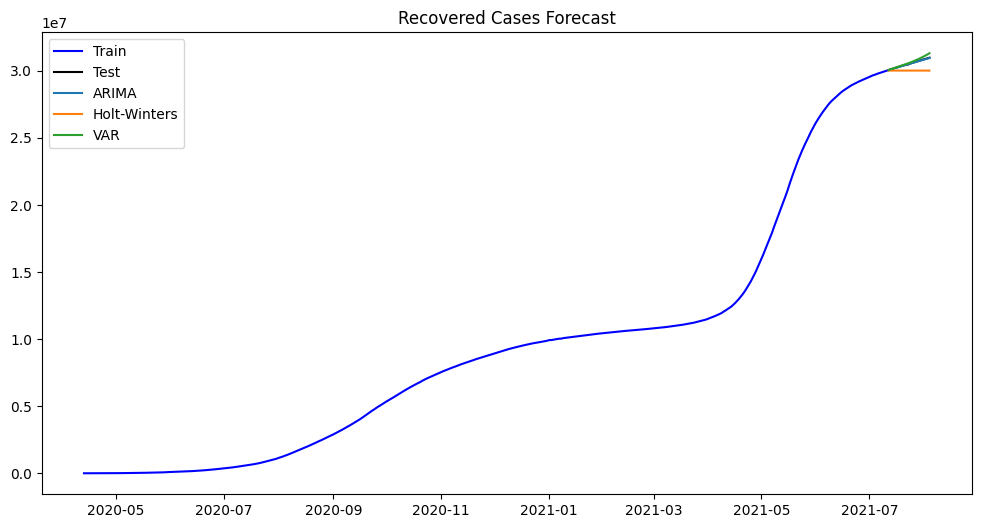

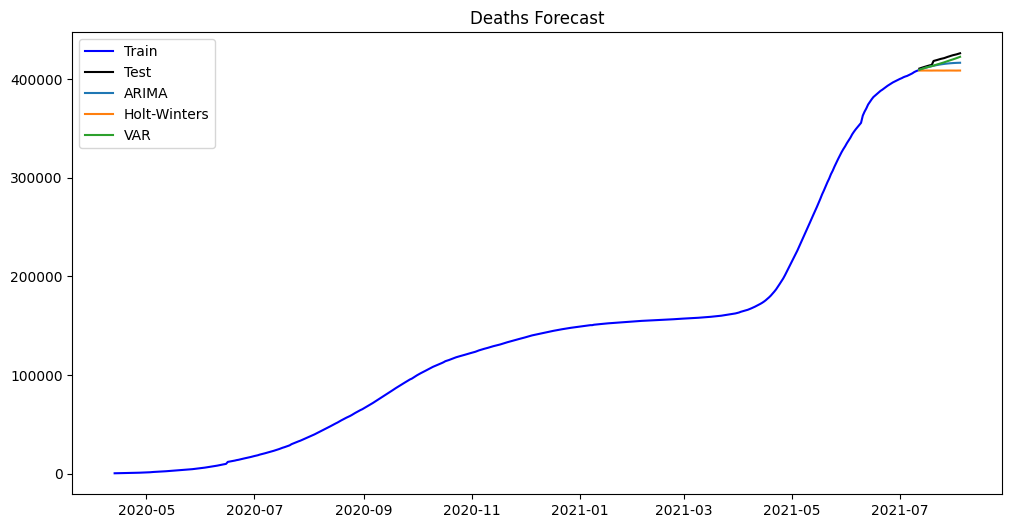

RMSE Results:
                   ARIMA   Holt-Winters            VAR
Confirmed  542999.415011  552524.646607  358768.360687
Recovered   16984.572891  575746.148772  139462.550922
Deaths       5736.971686   11525.790007    3552.804560

AIC Results (ARIMA only):
                  ARIMA
Confirmed  16904.171230
Deaths      6640.182381
Recovered   9576.699129


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Ensure data is numeric
data = data[['Confirmed', 'Recovered', 'Deaths']].astype(float)

# Split into train and test sets
train_ratio = 0.95
split_index = int(len(data) * train_ratio)
train, test = data[:split_index], data[split_index:]

# Function to fit ARIMA
def fit_arima(train, order, column):
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return model_fit, forecast

# ARIMA models
arima_confirmed, forecast_confirmed = fit_arima(train, (2, 0, 3), 'Confirmed')
arima_recovered, forecast_recovered = fit_arima(train, (1, 1, 1), 'Recovered')
arima_deaths, forecast_deaths = fit_arima(train, (2, 0, 0), 'Deaths')

# Function to fit Holt-Winters
def fit_holtwinters(train, column):
    model = ExponentialSmoothing(train[column], seasonal='add', seasonal_periods=7)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return model_fit, forecast

# Holt-Winters models
hw_confirmed, hw_forecast_confirmed = fit_holtwinters(train, 'Confirmed')
hw_recovered, hw_forecast_recovered = fit_holtwinters(train, 'Recovered')
hw_deaths, hw_forecast_deaths = fit_holtwinters(train, 'Deaths')

# VAR model
var_model = VAR(train)
var_model_fit = var_model.fit(maxlags=15)
var_forecast = var_model_fit.forecast(train.values[-var_model_fit.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=train.columns)

# RMSE Calculation
def calculate_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# AIC Calculation
def calculate_aic(model_fit):
    return model_fit.aic

# RMSE
rmse_results = {
    "ARIMA": {
        "Confirmed": calculate_rmse(test['Confirmed'], forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], forecast_deaths)
    },
    "Holt-Winters": {
        "Confirmed": calculate_rmse(test['Confirmed'], hw_forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], hw_forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], hw_forecast_deaths)
    },
    "VAR": {
        "Confirmed": calculate_rmse(test['Confirmed'], var_forecast_df['Confirmed']),
        "Recovered": calculate_rmse(test['Recovered'], var_forecast_df['Recovered']),
        "Deaths": calculate_rmse(test['Deaths'], var_forecast_df['Deaths'])
    }
}

# AIC
aic_results = {
    "ARIMA": {a
        "Confirmed": calculate_aic(arima_confirmed),
        "Recovered": calculate_aic(arima_recovered),
        "Deaths": calculate_aic(arima_deaths)
    }
}

# Plotting function for combined visualization
def plot_combined(train, test, forecasts, title, labels):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train', color='blue')
    plt.plot(test, label='Test', color='black')
    for forecast, label in zip(forecasts, labels):
        plt.plot(test.index, forecast, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

# Combined plots
plot_combined(
    train['Confirmed'], test['Confirmed'],
    [forecast_confirmed, hw_forecast_confirmed, var_forecast_df['Confirmed']],
    "Confirmed Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Recovered'], test['Recovered'],
    [forecast_recovered, hw_forecast_recovered, var_forecast_df['Recovered']],
    "Recovered Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Deaths'], test['Deaths'],
    [forecast_deaths, hw_forecast_deaths, var_forecast_df['Deaths']],
    "Deaths Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

# Display results
print("RMSE Results:")
print(pd.DataFrame(rmse_results))

print("\nAIC Results (ARIMA only):")
print(pd.DataFrame(aic_results))


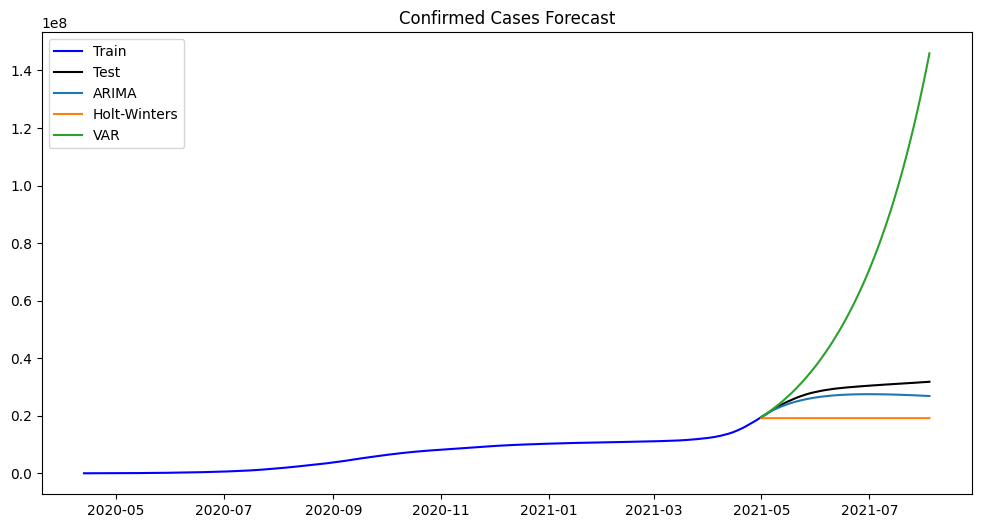

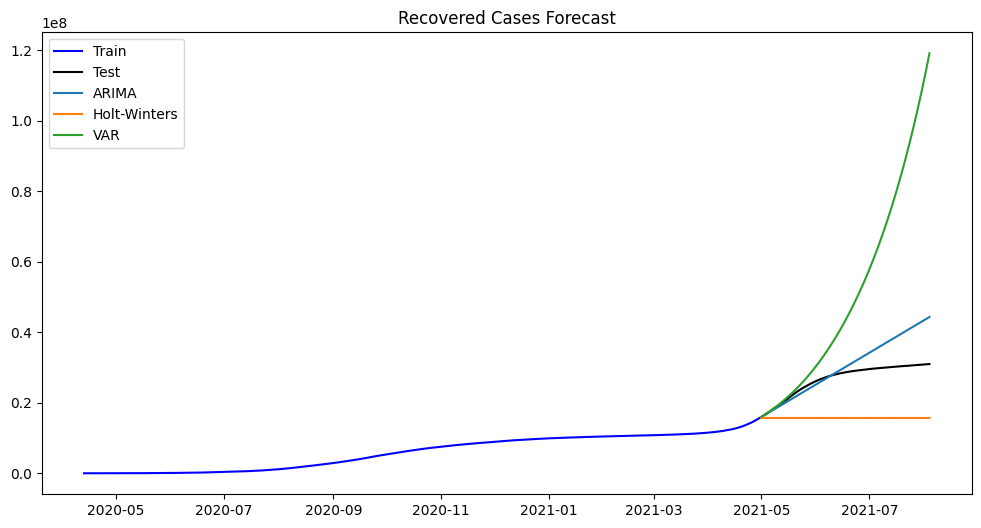

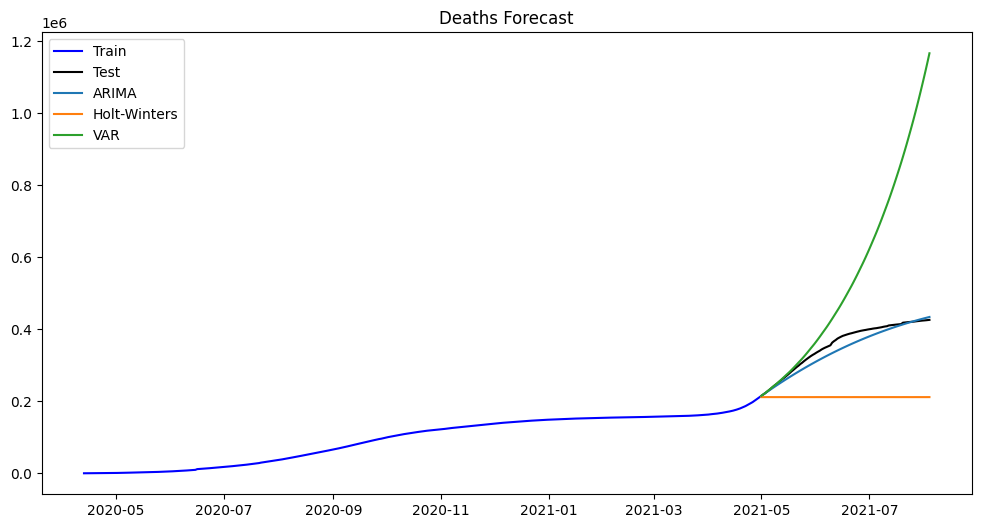

RMSE Results:
                  ARIMA  Holt-Winters           VAR
Confirmed  2.804695e+06  9.892410e+06  4.781621e+07
Recovered  5.769764e+06  1.183246e+07  3.571408e+07
Deaths     1.834053e+04  1.582096e+05  2.941339e+05

AIC Results (ARIMA only):
                ARIMA
Confirmed  9581.91229
Deaths     4955.64414
Recovered  7811.54931


In [40]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Ensure data is numeric
data = data[['Confirmed', 'Recovered', 'Deaths']].astype(float)

# Split into train and test sets
train_ratio = 0.8
split_index = int(len(data) * train_ratio)
train, test = data[:split_index], data[split_index:]

# Function to fit ARIMA
def fit_arima(train, order, column):
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return model_fit, forecast

# ARIMA models
arima_confirmed, forecast_confirmed = fit_arima(train, (2, 0, 3), 'Confirmed')
arima_recovered, forecast_recovered = fit_arima(train, (1, 1, 1), 'Recovered')
arima_deaths, forecast_deaths = fit_arima(train, (2, 0, 0), 'Deaths')

# Function to fit Holt-Winters
def fit_holtwinters(train, column):
    model = ExponentialSmoothing(train[column], seasonal='add', seasonal_periods=7)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return model_fit, forecast

# Holt-Winters models
hw_confirmed, hw_forecast_confirmed = fit_holtwinters(train, 'Confirmed')
hw_recovered, hw_forecast_recovered = fit_holtwinters(train, 'Recovered')
hw_deaths, hw_forecast_deaths = fit_holtwinters(train, 'Deaths')

# VAR model
var_model = VAR(train)
var_model_fit = var_model.fit(maxlags=15)
var_forecast = var_model_fit.forecast(train.values[-var_model_fit.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=train.columns)

# RMSE Calculation
def calculate_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# AIC Calculation
def calculate_aic(model_fit):
    return model_fit.aic

# RMSE
rmse_results = {
    "ARIMA": {
        "Confirmed": calculate_rmse(test['Confirmed'], forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], forecast_deaths)
    },
    "Holt-Winters": {
        "Confirmed": calculate_rmse(test['Confirmed'], hw_forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], hw_forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], hw_forecast_deaths)
    },
    "VAR": {
        "Confirmed": calculate_rmse(test['Confirmed'], var_forecast_df['Confirmed']),
        "Recovered": calculate_rmse(test['Recovered'], var_forecast_df['Recovered']),
        "Deaths": calculate_rmse(test['Deaths'], var_forecast_df['Deaths'])
    }
}

# AIC
aic_results = {
    "ARIMA": {
        "Confirmed": calculate_aic(arima_confirmed),
        "Recovered": calculate_aic(arima_recovered),
        "Deaths": calculate_aic(arima_deaths)
    }
}

# Plotting function for combined visualization
def plot_combined(train, test, forecasts, title, labels):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train', color='blue')
    plt.plot(test, label='Test', color='black')
    for forecast, label in zip(forecasts, labels):
        plt.plot(test.index, forecast, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

# Combined plots
plot_combined(
    train['Confirmed'], test['Confirmed'],
    [forecast_confirmed, hw_forecast_confirmed, var_forecast_df['Confirmed']],
    "Confirmed Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Recovered'], test['Recovered'],
    [forecast_recovered, hw_forecast_recovered, var_forecast_df['Recovered']],
    "Recovered Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Deaths'], test['Deaths'],
    [forecast_deaths, hw_forecast_deaths, var_forecast_df['Deaths']],
    "Deaths Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

# Display results
print("RMSE Results:")
print(pd.DataFrame(rmse_results))

print("\nAIC Results (ARIMA only):")
print(pd.DataFrame(aic_results))


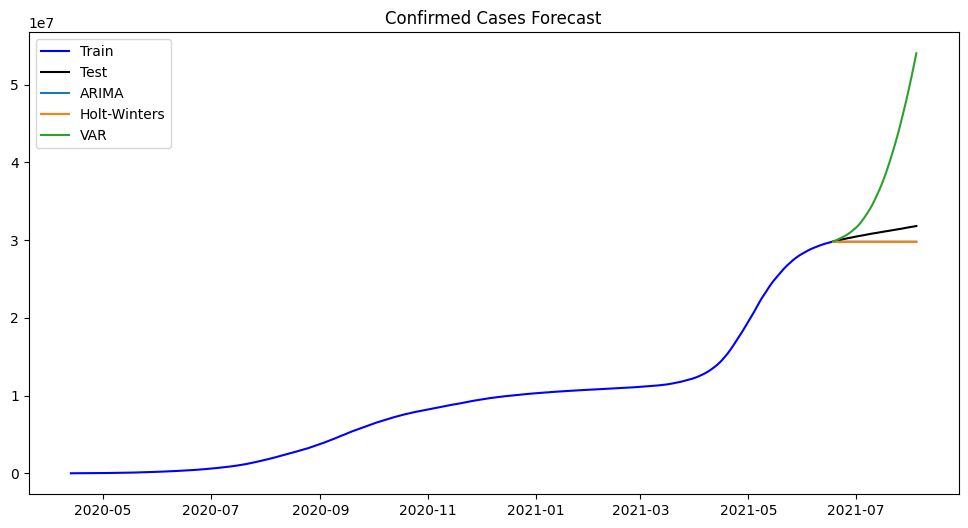

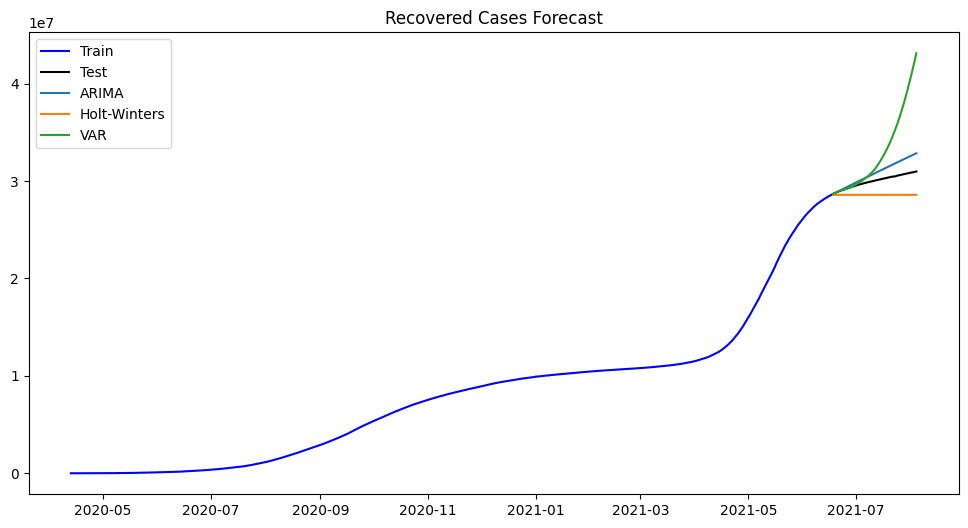

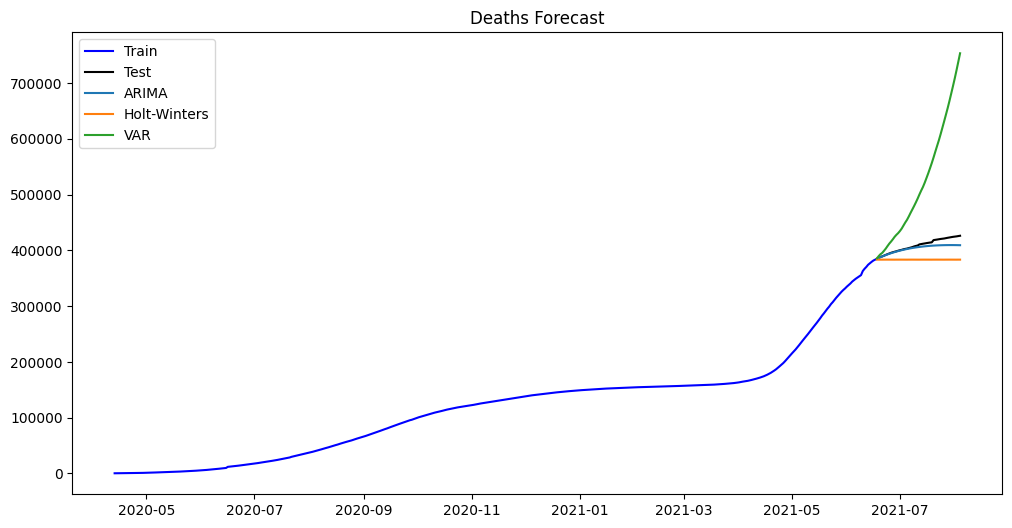

RMSE Results:
                  ARIMA  Holt-Winters           VAR
Confirmed  1.213329e+06  1.242686e+06  9.462370e+06
Recovered  1.000573e+06  1.534971e+06  4.607287e+06
Deaths     7.978641e+03  2.795810e+04  1.480951e+05

AIC Results (ARIMA only):
                  ARIMA
Confirmed  16009.610500
Deaths      6308.463700
Recovered   9085.747394


In [35]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Ensure data is numeric
data = data[['Confirmed', 'Recovered', 'Deaths']].astype(float)

# Split into train and test sets
train_ratio = 0.9
split_index = int(len(data) * train_ratio)
train, test = data[:split_index], data[split_index:]

# Function to fit ARIMA
def fit_arima(train, order, column):
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return model_fit, forecast

# ARIMA models
arima_confirmed, forecast_confirmed = fit_arima(train, (2, 0, 3), 'Confirmed')
arima_recovered, forecast_recovered = fit_arima(train, (1, 1, 1), 'Recovered')
arima_deaths, forecast_deaths = fit_arima(train, (2, 0, 0), 'Deaths')

# Function to fit Holt-Winters
def fit_holtwinters(train, column):
    model = ExponentialSmoothing(train[column], seasonal='add', seasonal_periods=7)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return model_fit, forecast

# Holt-Winters models
hw_confirmed, hw_forecast_confirmed = fit_holtwinters(train, 'Confirmed')
hw_recovered, hw_forecast_recovered = fit_holtwinters(train, 'Recovered')
hw_deaths, hw_forecast_deaths = fit_holtwinters(train, 'Deaths')

# VAR model
var_model = VAR(train)
var_model_fit = var_model.fit(maxlags=15)
var_forecast = var_model_fit.forecast(train.values[-var_model_fit.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=train.columns)

# RMSE Calculation
def calculate_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# AIC Calculation
def calculate_aic(model_fit):
    return model_fit.aic

# RMSE
rmse_results = {
    "ARIMA": {
        "Confirmed": calculate_rmse(test['Confirmed'], forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], forecast_deaths)
    },
    "Holt-Winters": {
        "Confirmed": calculate_rmse(test['Confirmed'], hw_forecast_confirmed),
        "Recovered": calculate_rmse(test['Recovered'], hw_forecast_recovered),
        "Deaths": calculate_rmse(test['Deaths'], hw_forecast_deaths)
    },
    "VAR": {
        "Confirmed": calculate_rmse(test['Confirmed'], var_forecast_df['Confirmed']),
        "Recovered": calculate_rmse(test['Recovered'], var_forecast_df['Recovered']),
        "Deaths": calculate_rmse(test['Deaths'], var_forecast_df['Deaths'])
    }
}

# AIC
aic_results = {
    "ARIMA": {
        "Confirmed": calculate_aic(arima_confirmed),
        "Recovered": calculate_aic(arima_recovered),
        "Deaths": calculate_aic(arima_deaths)
    }
}

# Plotting function for combined visualization
def plot_combined(train, test, forecasts, title, labels):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train', color='blue')
    plt.plot(test, label='Test', color='black')
    for forecast, label in zip(forecasts, labels):
        plt.plot(test.index, forecast, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

# Combined plots
plot_combined(
    train['Confirmed'], test['Confirmed'],
    [forecast_confirmed, hw_forecast_confirmed, var_forecast_df['Confirmed']],
    "Confirmed Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Recovered'], test['Recovered'],
    [forecast_recovered, hw_forecast_recovered, var_forecast_df['Recovered']],
    "Recovered Cases Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

plot_combined(
    train['Deaths'], test['Deaths'],
    [forecast_deaths, hw_forecast_deaths, var_forecast_df['Deaths']],
    "Deaths Forecast",
    ["ARIMA", "Holt-Winters", "VAR"]
)

# Display results
print("RMSE Results:")
print(pd.DataFrame(rmse_results))

print("\nAIC Results (ARIMA only):")
print(pd.DataFrame(aic_results))


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0491 - val_loss: 0.1528
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0264 - val_loss: 0.0735
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0252
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - val_loss: 0.0143
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4615e-04 - val_loss: 0.0089
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.7660e-04 - val_loss: 0.0071
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6761e-04 - val_loss: 0.0068
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.5976e-04 - val_loss: 0.0078
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3508e-04 - val_loss: 0.0097
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1

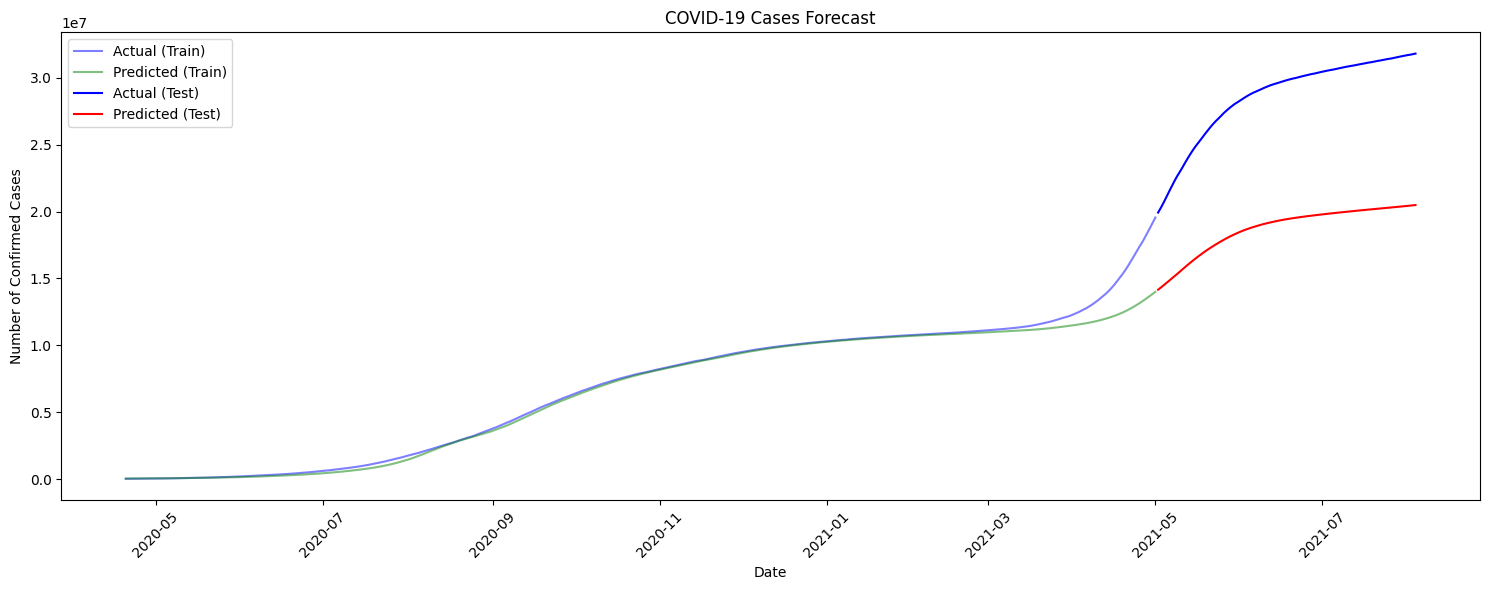

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv', parse_dates=['Date'])
# Assuming data is already loaded
# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 7
split_ratio = 0.8
n_features = 1

# Prepare the data
data = data.sort_values('Date')
confirmed_cases = data['Confirmed'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(confirmed_cases)

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print(f'Train RMSE: {train_rmse:,.0f}')
print(f'Test RMSE: {test_rmse:,.0f}')

# Create dates for plotting
dates = data['Date'].values[sequence_length:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(train_dates, y_train_inv, label='Actual (Train)', color='blue', alpha=0.5)
plt.plot(train_dates, train_predict, label='Predicted (Train)', color='green', alpha=0.5)
plt.plot(test_dates, y_test_inv, label='Actual (Test)', color='blue')
plt.plot(test_dates, test_predict, label='Predicted (Test)', color='red')
plt.title('COVID-19 Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


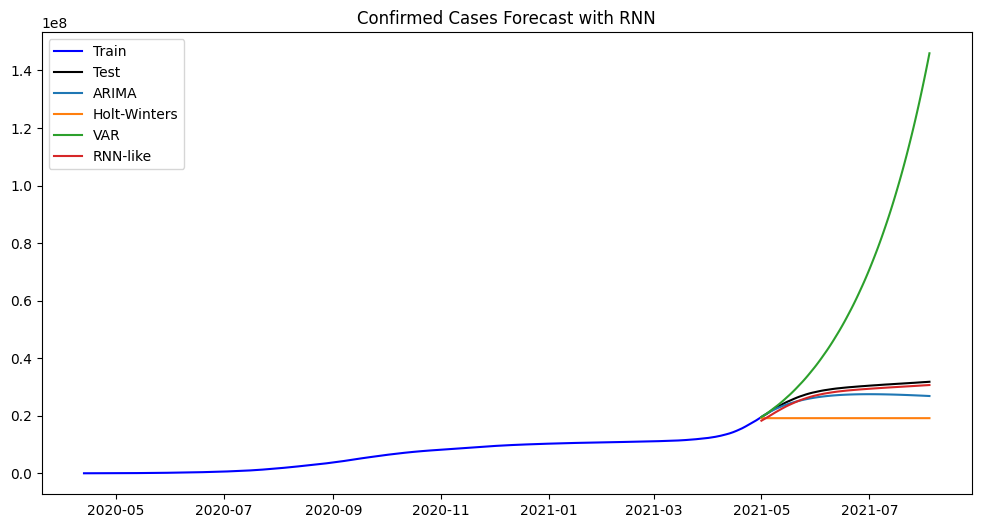

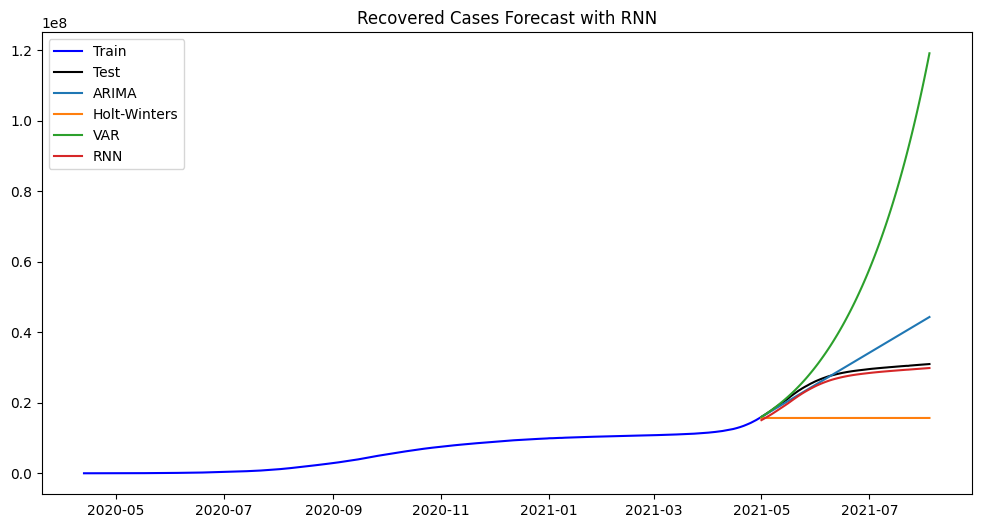

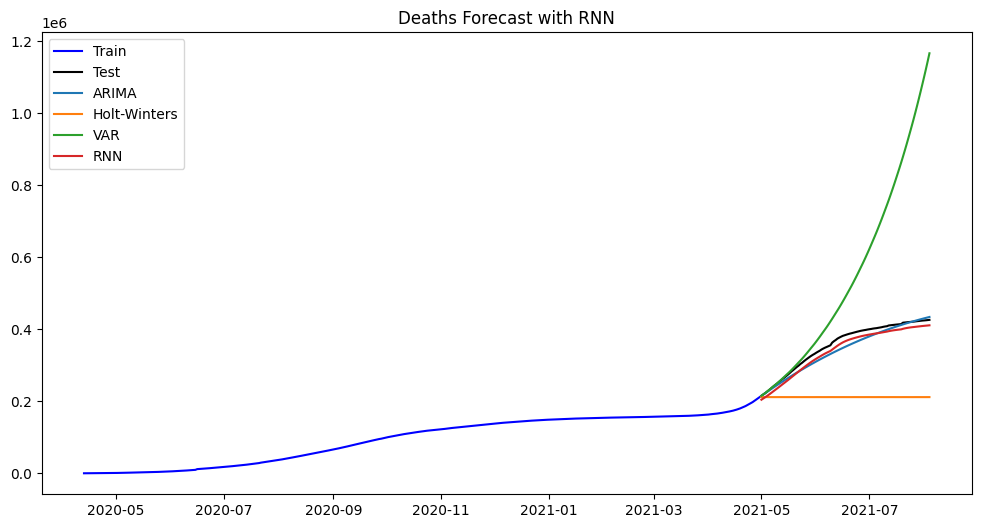

Updated RMSE Results with RNN Forecast:
                  ARIMA  Holt-Winters           VAR      RNN-like  \
Confirmed  2.804695e+06  9.892410e+06  4.781621e+07  1.193589e+06   
Recovered  5.769764e+06  1.183246e+07  3.571408e+07  1.199985e+06   
Deaths     1.834053e+04  1.582096e+05  2.941339e+05  1.562835e+04   

                    RNN  
Confirmed  1.193589e+06  
Recovered  1.199985e+06  
Deaths     1.562835e+04  
